In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/XRP-USD.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-26,0.617544,0.652549,0.608588,0.622072,0.622072,2302112575
1,2022-01-27,0.621945,0.623508,0.591465,0.608770,0.608770,1586137620
2,2022-01-28,0.608619,0.612861,0.593397,0.612512,0.612512,1318006848
3,2022-01-29,0.612491,0.623406,0.610258,0.616935,0.616935,958847124
4,2022-01-30,0.617006,0.622546,0.599771,0.603181,0.603181,870878596


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-01-22,0.403573,0.411099,0.397903,0.400967,0.400967,780764704
362,2023-01-23,0.400960,0.431117,0.400433,0.424943,0.424943,1980513812
363,2023-01-24,0.424777,0.429545,0.405651,0.407707,0.407707,1265360172
364,2023-01-25,0.407745,0.423475,0.399544,0.417693,0.417693,1104907019
365,2023-01-26,0.417751,0.417751,0.414271,0.414768,0.414768,1035729152


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,0.487923,0.500831,0.473308,0.487376,0.487376,1.633521e+09
std,0.171034,0.176334,0.166449,0.170957,0.170957,9.697428e+08
min,0.308033,0.317014,0.290579,0.308090,0.308090,2.253910e+08
25%,0.358920,0.368901,0.348243,0.358904,0.358904,9.694337e+08
50%,0.400809,0.410957,0.387822,0.400807,0.400807,1.396636e+09
75%,0.612220,0.626627,0.598900,0.610748,0.610748,1.990230e+09
max,0.877515,0.911137,0.855211,0.878194,0.878194,7.798771e+09


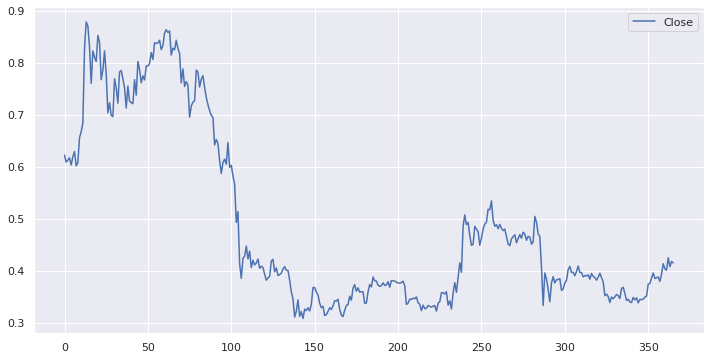

In [6]:
df[['Close']].plot(figsize=(12,6));


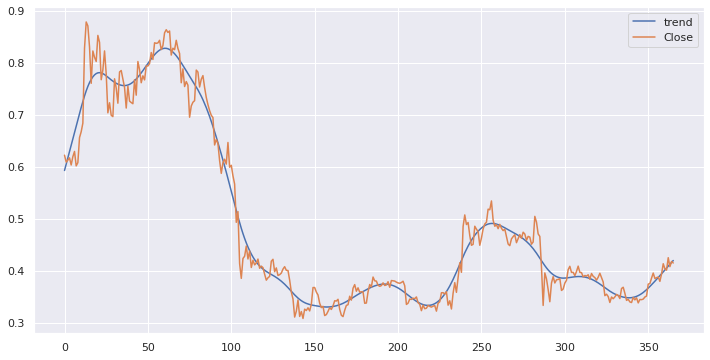

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.264628286105408,
 0.645195622919164,
 6,
 359,
 {'1%': -3.4486972813047574,
  '5%': -2.8696246923288418,
  '10%': -2.571077032068342},
 -1707.584575541151)

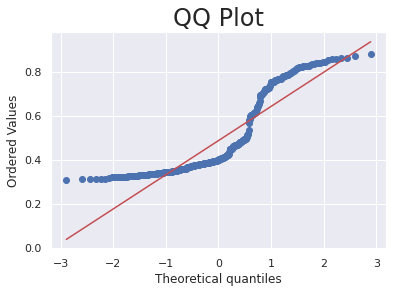

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


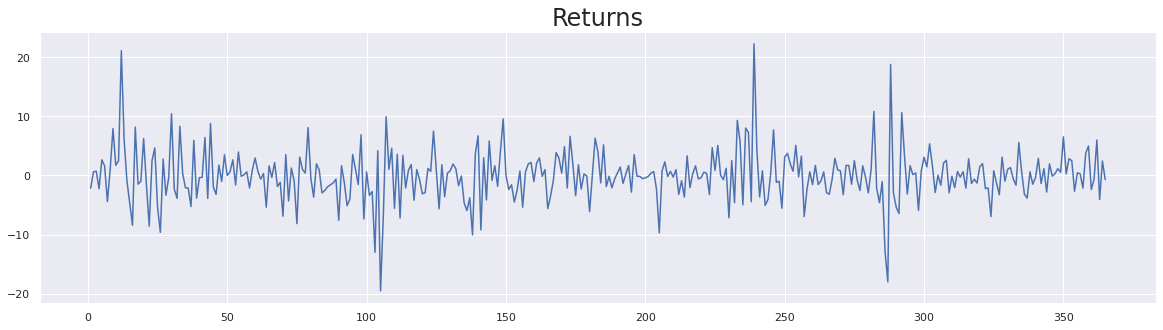

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


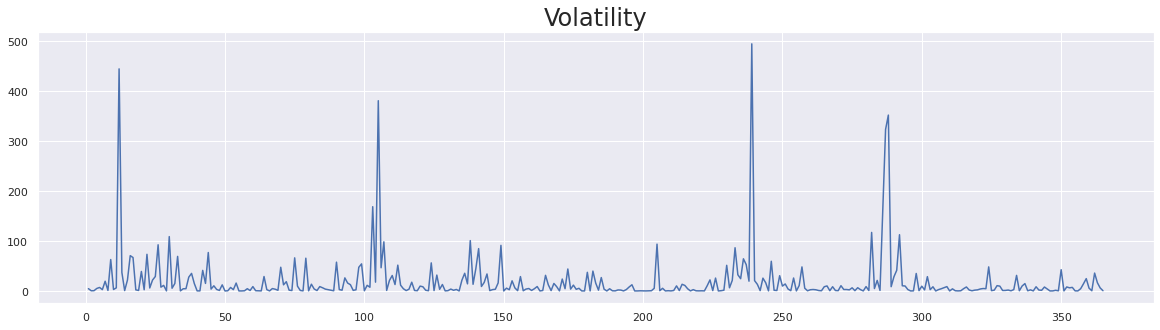

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

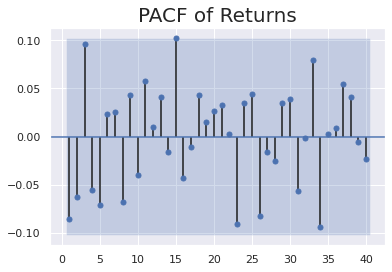

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

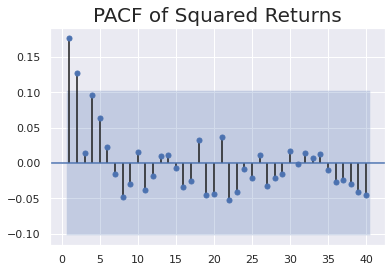

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 12.7 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1062.0744501679096
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1048.0501188035128
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1047.862726864009
Iteration:      4,   Func. Count:     21,   Neg. LLF: 1047.8619434914447
Iteration:      5,   Func. Count:     25,   Neg. LLF: 1047.861934001645
Iteration:      6,   Func. Count:     28,   Neg. LLF: 1047.8619340015748
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1047.861934001645
            Iterations: 6
            Function evaluations: 28
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1047.86
Distribution:                  Normal   AIC:                           2101.72
Method:            Maximum Likelihood   BIC:                           2113.42
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         3.1531e-03      0.222  1.422e-02      0.989 [ -0.431,  0.438]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         14.7141      2.398      6.135  8.513e-10    [ 10.013, 19.415]
alpha[1]       0.2667      0.163      1.637      0.102 [-5.264e-02,  0.586]
===========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 1038.4337055973838
Iteration:     10,   Func. Count:     56,   Neg. LLF: 1038.3692714159747
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1038.3692714159747
            Iterations: 11
            Function evaluations: 60
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1038.37
Distribution:                  Normal   AIC:                           2084.74
Method:            Maximum Likelihood   BIC:                           2100.34
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0479      0.183      0.262      0.793 [ -0.310,  0.406]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         11.8295      2.382      4.967  6.813e-07    [  7.161, 16.498]
alpha[1]       0.1324  9.627e-02      1.375      0.169 [-5.632e-02,  0.321]
alpha[2]       0.2823      0.169      1.675  9.400e-02 [-4.810e-02,  0.613]
===========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1053.0325867679621
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1030.0917926525149
            Iterations: 9
            Function evaluations: 61
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1030.09
Distribution:                  Normal   AIC:                           2070.18
Method:            Maximum Likelihood   BIC:                           2089.68
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0123      0.189  6.492e-02      0.948 [ -0.359,  0.383]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          8.6652      1.666      5.202  1.967e-07    [  5.401, 11.930]
alpha[1]       0.0954  7.963e-02      1.198      0.231 [-6.067e-02,  0.251]
alpha[2]       0.2711      0.134      2.030  4.240e-02  [9.296e-03,  0.533]
alpha[3]       0.2555      0.159      1.603      0.109 [-5.682e-02,  0.568]
===========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     85,   Neg. LLF: 1288.9910084461499
Iteration:     10,   Func. Count:    170,   Neg. LLF: 1026.0829662442147
Iteration:     15,   Func. Count:    254,   Neg. LLF: 1021.4332148353301
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1021.2212648332843
            Iterations: 19
            Function evaluations: 319
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1021.22
Distribution:                  Normal   AIC:                           2072.44
Method:            Maximum Likelihood   BIC:                           2130.94
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:50   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0225      4.068 -5.518e-03      0.996 [ -7.996,  7.951]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          6.3643     34.601      0.184      0.854 [-61.453, 74.182]
alpha[1]       0.0209      2.027  1.031e-02      0.992 [ -3.952,  3.994]
alpha[2]       0.2184      1.221      0.179      0.858 [ -2.176,  2.612]
alpha[3]       0.2084      0.963      0.216      0.829 [ -1.679,  2.096]
alpha[4]       0.1088      1.015      0.107      0.915 [ -1.880,  2.098]
alpha[5]       0.1582      3.282  4.818e-02      0.962 [ -6.275,  6.591]
alpha[6]   5.2535e-12      0.216  2.431e-11      1.000 [ -0.424,  0.424]
alpha[7]   5.8416e-13      1.166  5.009e-13      1.000 [ -2.286,  2.286]
alpha[8]   6.4730e-12      0.676  9.581e-12      1.000 [ -1.324,  1.324]
alpha[9]   1.9806e-12      0.386  5.125e-12      1.000 [ -0.757,  0.757]
alpha[10]      0.0140      3.628  3.866e-03      0.997 [ -7.096,  7.124]
alpha[11]  1.5868e-12      3.323  4.776e-13      1.000 [ -6.513,  6.513]
alpha[12]  4.7707e-12      6.187  7.710e-13      1.000 [-12.127, 12.127]
alpha[13]  8.4876e-12      4.161  2.040e-12      1.000 [ -8.156,  8.156]
========================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1029.2739265599569
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1029.273903296865
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1029.27
Distribution:                  Normal   AIC:                           2066.55
Method:            Maximum Likelihood   BIC:                           2082.15
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:50   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -9.0076e-03      0.174 -5.185e-02      0.959 [ -0.350,  0.331]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.2561      0.772      2.922  3.483e-03   [  0.743,  3.770]
alpha[1]       0.2099  6.987e-02      3.003  2.669e-03 [7.291e-02,  0.347]
beta[1]        0.6869  4.736e-02     14.503  1.152e-47   [  0.594,  0.780]
==========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1034.105969382362
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1029.2739035661693
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1029.273903070804
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1029.27
Distribution:                  Normal   AIC:                           2068.55
Method:            Maximum Likelihood   BIC:                           2088.05
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:50   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -8.9947e-03      0.174 -5.182e-02      0.959 [ -0.349,  0.331]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.2565      0.918      2.457  1.400e-02   [  0.457,  4.056]
alpha[1]       0.2099      0.107      1.966  4.934e-02 [6.089e-04,  0.419]
beta[1]        0.6869      0.511      1.344      0.179   [ -0.314,  1.688]
beta[2]        0.0000      0.422      0.000      1.000   [ -0.827,  0.827]
==========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1031.3997083075897
Iteration:     10,   Func. Count:     79,   Neg. LLF: 1029.273912025326
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1029.2739034674287
            Iterations: 12
            Function evaluations: 92
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1029.27
Distribution:                  Normal   AIC:                           2070.55
Method:            Maximum Likelihood   BIC:                           2093.95
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:50   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -8.9218e-03      0.180 -4.944e-02      0.961 [ -0.363,  0.345]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.2560      1.045      2.158  3.089e-02    [  0.207,  4.305]
alpha[1]       0.2098      0.132      1.591      0.112 [-4.873e-02,  0.468]
beta[1]        0.6869      0.714      0.963      0.336    [ -0.712,  2.086]
beta[2]    4.3346e-14      0.918  4.724e-14      1.000    [ -1.798,  1.798]
beta[3]        0.0000      0.385      0.000      1.000    [ -0.754,  0.754]
===========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1026.8868162610552
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1024.9651517517175
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1024.965150960704
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1024.97
Distribution:                  Normal   AIC:                           2059.93
Method:            Maximum Likelihood   BIC:                           2079.43
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:50   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0177      0.182 -9.699e-02      0.923 [ -0.375,  0.339]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          3.0360      0.978      3.105  1.906e-03    [  1.119,  4.953]
alpha[1]       0.0630  7.468e-02      0.843      0.399 [-8.339e-02,  0.209]
alpha[2]       0.2513      0.126      1.990  4.655e-02  [3.842e-03,  0.499]
beta[1]        0.5548  6.814e-02      8.143  3.869e-16    [  0.421,  0.688]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1079.1841515303768
Iteration:     10,   Func. Count:     80,   Neg. LLF: 1023.3314837666235
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1023.3312450233685
            Iterations: 14
            Function evaluations: 107
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1023.33
Distribution:                  Normal   AIC:                           2058.66
Method:            Maximum Likelihood   BIC:                           2082.06
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:50   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0352      0.185     -0.190      0.849 [ -0.399,  0.328]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          3.9331      1.387      2.836  4.571e-03    [  1.215,  6.651]
alpha[1]       0.0626  7.241e-02      0.864      0.387 [-7.934e-02,  0.205]
alpha[2]       0.1747      0.114      1.535      0.125 [-4.830e-02,  0.398]
alpha[3]       0.1736      0.159      1.092      0.275    [ -0.138,  0.485]
beta[1]        0.4184      0.138      3.026  2.476e-03    [  0.147,  0.689]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1629.002964758947
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1027.4010642694311
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1027.4010399982462
            Iterations: 13
            Function evaluations: 92
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1027.40
Distribution:                  Normal   AIC:                           2064.80
Method:            Maximum Likelihood   BIC:                           2084.30
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:50   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1268      0.194     -0.653      0.514 [ -0.507,  0.254]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.4233      0.150      2.830  4.653e-03 [  0.130,  0.716]
alpha[1]       0.3529  8.534e-02      4.135  3.545e-05 [  0.186,  0.520]
gamma[1]      -0.0926      0.111     -0.836      0.403 [ -0.309,  0.124]
beta[1]        0.8584  5.139e-02     16.703  1.240e-62 [  0.758,  0.959]
========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1028.66
Distribution:                  Normal   AIC:                           2067.31
Method:            Maximum Likelihood   BIC:                           2086.81
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:51   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0688      0.189     -0.364      0.716 [ -0.440,  0.302]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.2276      0.824      2.702  6.893e-03    [  0.612,  3.843]
alpha[1]       0.1516      0.128      1.188      0.235 [-9.862e-02,  0.402]
gamma[1]       0.1120      0.193      0.582      0.561    [ -0.265,  0.489]
beta[1]        0.6920  4.959e-02     13.955  2.949e-44    [  0.595,  0.789]
===========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1508.9576461388822
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1026.7827790772385
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1026.7826213720336
            Iterations: 13
            Function evaluations: 90
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1026.78
Distribution:                  Normal   AIC:                           2063.57
Method:            Maximum Likelihood   BIC:                           2083.06
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:51   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1384      0.191     -0.725      0.469 [ -0.513,  0.236]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5936      0.205      2.901  3.721e-03    [  0.193,  0.995]
alpha[1]       0.1574  9.477e-02      1.660  9.684e-02 [-2.839e-02,  0.343]
gamma[1]       0.1066      0.136      0.785      0.433    [ -0.160,  0.373]
beta[1]        0.7074  4.807e-02     14.716  5.055e-49    [  0.613,  0.802]
===========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1033.6141474150581
Iteration:     10,   Func. Count:     67,   Neg. LLF: 1030.9844932029869
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1030.9844776360087
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1030.98
Distribution:                  Normal   AIC:                           2071.97
Method:            Maximum Likelihood   BIC:                           2091.47
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:51   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -6.9628e-03      0.231 -3.012e-02      0.976 [ -0.460,  0.446]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.6994      7.732      0.220      0.826 [-13.456, 16.854]
phi        6.9289e-13      2.618  2.647e-13      1.000 [ -5.131,  5.131]
d              0.6837      3.301      0.207      0.836 [ -5.786,  7.153]
beta           0.4949      1.060      0.467      0.641 [ -1.583,  2.573]
========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     29,   Neg. LLF: 1056.6924850101313
Iteration:     10,   Func. Count:     50,   Neg. LLF: 1048.114547003173
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1047.8619339990587
            Iterations: 14
            Function evaluations: 65
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1047.86
Distribution:                  Normal   AIC:                           2101.72
Method:            Maximum Likelihood   BIC:                           2113.42
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:51   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         3.2114e-03      0.222  1.449e-02      0.988 [ -0.431,  0.438]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         14.7137      2.398      6.135  8.526e-10    [ 10.013, 19.414]
alpha[1]       0.2667      0.163      1.637      0.102 [-5.269e-02,  0.586]
===========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1707.861024587425
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1027.796244104551
Iteration:     15,   Func. Count:    120,   Neg. LLF: 1027.388020594262
Iteration:     20,   Func. Count:    157,   Neg. LLF: 1027.169988097466
Iteration:     25,   Func. Count:    201,   Neg. LLF: 1027.1190448897157
Iteration:     30,   Func. Count:    239,   Neg. LLF: 1026.9253701636194
Iteration:     35,   Func. Count:    279,   Neg. LLF: 1028.517492692037
Iteration:     40,   Func. Count:    318,   Neg. LLF: 1025.7609659738926
Iteration:     45,   Func. Count:    381,   Neg. LLF: 1025.9224443645494
Iteration:     50,   Func. Count:    421,   Neg. LLF: 1025.3046260888445
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1025.3046261905192
            Iterations: 51
            Function evaluations: 438
            Gradient evaluations: 51


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1025.30
Distribution:                  Normal   AIC:                           2062.61
Method:            Maximum Likelihood   BIC:                           2086.01
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:32:52   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1317  6.217e-03    -21.190  1.186e-99 [ -0.144, -0.120]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1869  4.348e-02      4.299  1.718e-05    [  0.102,  0.272]
alpha[1]       0.1413  7.956e-02      1.776  7.570e-02 [-1.462e-02,  0.297]
gamma[1]       0.2935      1.807      0.162      0.871    [ -3.248,  3.835]
beta[1]        0.6904      0.399      1.732  8.319e-02 [-9.065e-02,  1.471]
delta          0.0500      1.314  3.805e-02      0.970    [ -2.525,  2.625]
===========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=62.508715504786764, pvalue=2.6645352591003757e-14)

In [46]:
jarque_bera_test.statistic

62.508715504786764

In [47]:
jarque_bera_test.pvalue

2.6645352591003757e-14

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1     -2.138338
2      0.614682
3      0.722108
4     -2.229408
5      2.647298
         ...   
361   -0.635884
362    5.979544
363   -4.056073
364    2.449308
365   -0.700275
Name: returns, Length: 365, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=387.4794463462836, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

387.4794463462836

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

5.065316718944665

coef. asimetria

In [53]:
returns.skew()

0.41391728754526125

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -20.788
P-value                         0.000
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -7.890
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -2.62 (1%), -2.00 (5%), -1.68 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -10.605
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.111
P-value                         0.534
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        366 non-null    object 
 1   Open        366 non-null    float64
 2   High        366 non-null    float64
 3   Low         366 non-null    float64
 4   Close       366 non-null    float64
 5   Adj Close   366 non-null    float64
 6   Volume      366 non-null    int64  
 7   trend       366 non-null    float64
 8   returns     365 non-null    float64
 9   sq_returns  365 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 28.7+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/XRP-USD.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-26,0.617544,0.652549,0.608588,0.622072,0.622072,2302112575
1,2022-01-27,0.621945,0.623508,0.591465,0.608770,0.608770,1586137620
2,2022-01-28,0.608619,0.612861,0.593397,0.612512,0.612512,1318006848
3,2022-01-29,0.612491,0.623406,0.610258,0.616935,0.616935,958847124
4,2022-01-30,0.617006,0.622546,0.599771,0.603181,0.603181,870878596
...,...,...,...,...,...,...,...
361,2023-01-22,0.403573,0.411099,0.397903,0.400967,0.400967,780764704
362,2023-01-23,0.400960,0.431117,0.400433,0.424943,0.424943,1980513812
363,2023-01-24,0.424777,0.429545,0.405651,0.407707,0.407707,1265360172
364,2023-01-25,0.407745,0.423475,0.399544,0.417693,0.417693,1104907019


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2022-01-26,0.622072,2302112575
1,2022-01-27,0.608770,1586137620
2,2022-01-28,0.612512,1318006848
3,2022-01-29,0.616935,958847124
4,2022-01-30,0.603181,870878596
...,...,...,...
361,2023-01-22,0.400967,780764704
362,2023-01-23,0.424943,1980513812
363,2023-01-24,0.407707,1265360172
364,2023-01-25,0.417693,1104907019


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2022-01-26,0.622072,2302112575,0.608770
1,2022-01-27,0.608770,1586137620,0.612512
2,2022-01-28,0.612512,1318006848,0.616935
3,2022-01-29,0.616935,958847124,0.603181
4,2022-01-30,0.603181,870878596,0.619149
...,...,...,...,...
361,2023-01-22,0.400967,780764704,0.424943
362,2023-01-23,0.424943,1980513812,0.407707
363,2023-01-24,0.407707,1265360172,0.417693
364,2023-01-25,0.417693,1104907019,0.414768


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2022-01-26,0.622072,2302112575,0.608770
1,2022-01-27,0.608770,1586137620,0.612512
2,2022-01-28,0.612512,1318006848,0.616935
3,2022-01-29,0.616935,958847124,0.603181
4,2022-01-30,0.603181,870878596,0.619149
...,...,...,...,...
360,2023-01-21,0.403533,1037235129,0.400967
361,2023-01-22,0.400967,780764704,0.424943
362,2023-01-23,0.424943,1980513812,0.407707
363,2023-01-24,0.407707,1265360172,0.417693


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.55074513, 0.27421332, 0.52741254],
       [0.52741254, 0.17967495, 0.53397626],
       [0.53397626, 0.14427057, 0.54173449],
       ...,
       [0.20496787, 0.23174895, 0.17473479],
       [0.17473479, 0.13731903, 0.19225089],
       [0.19225089, 0.11613256, 0.18712024]])

In [73]:
price_volume_target_scaled_df.shape

(365, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((365, 2), (365, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((237, 2), (237, 1))

In [78]:
X_test.shape, y_test.shape

((128, 2), (128, 1))

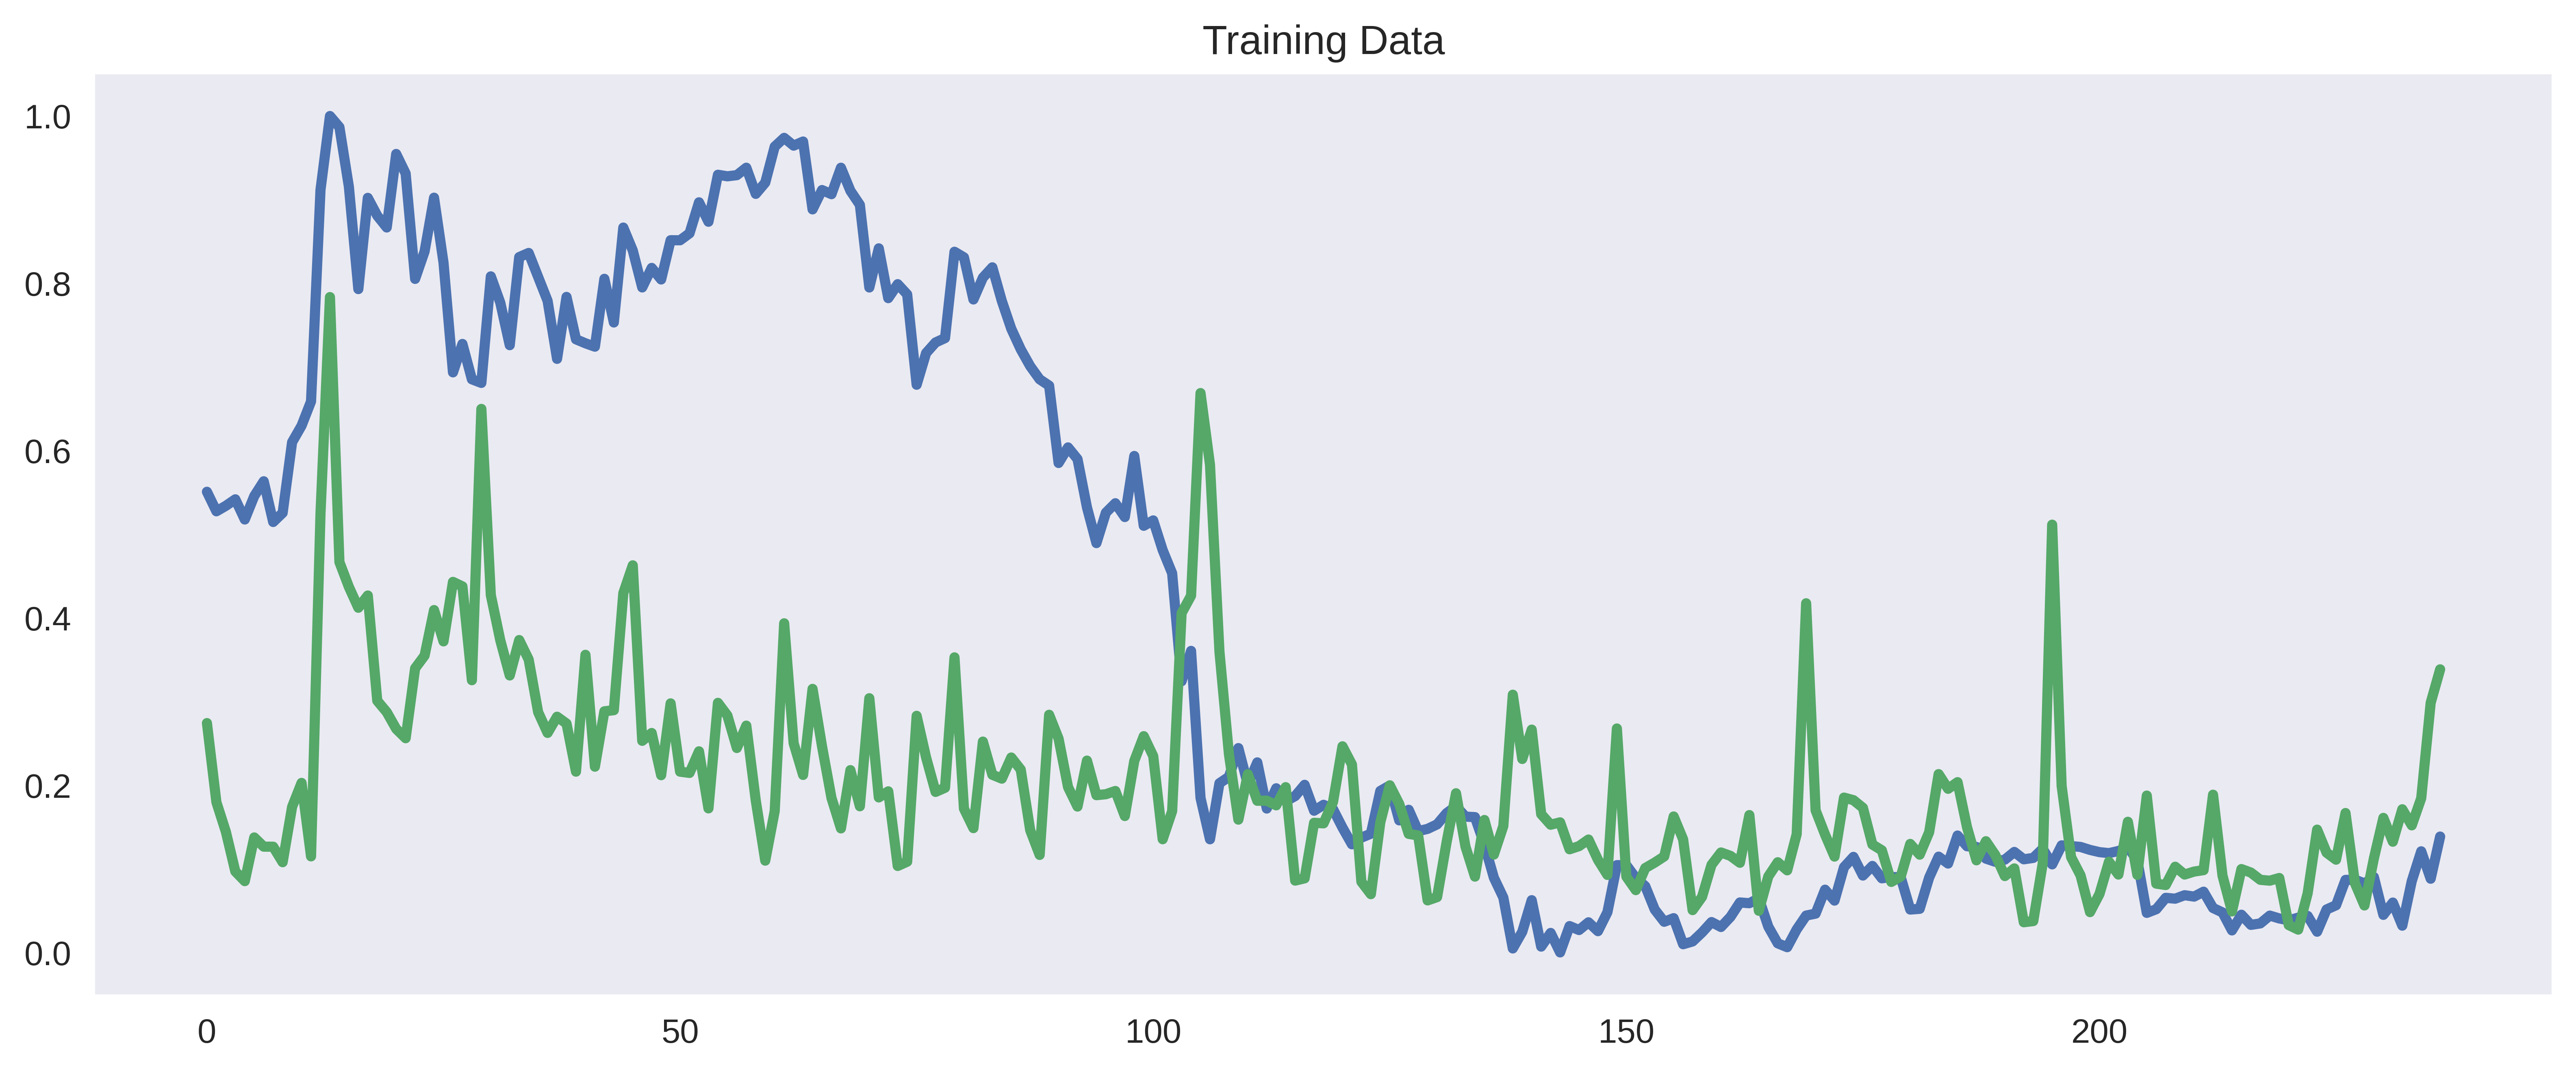

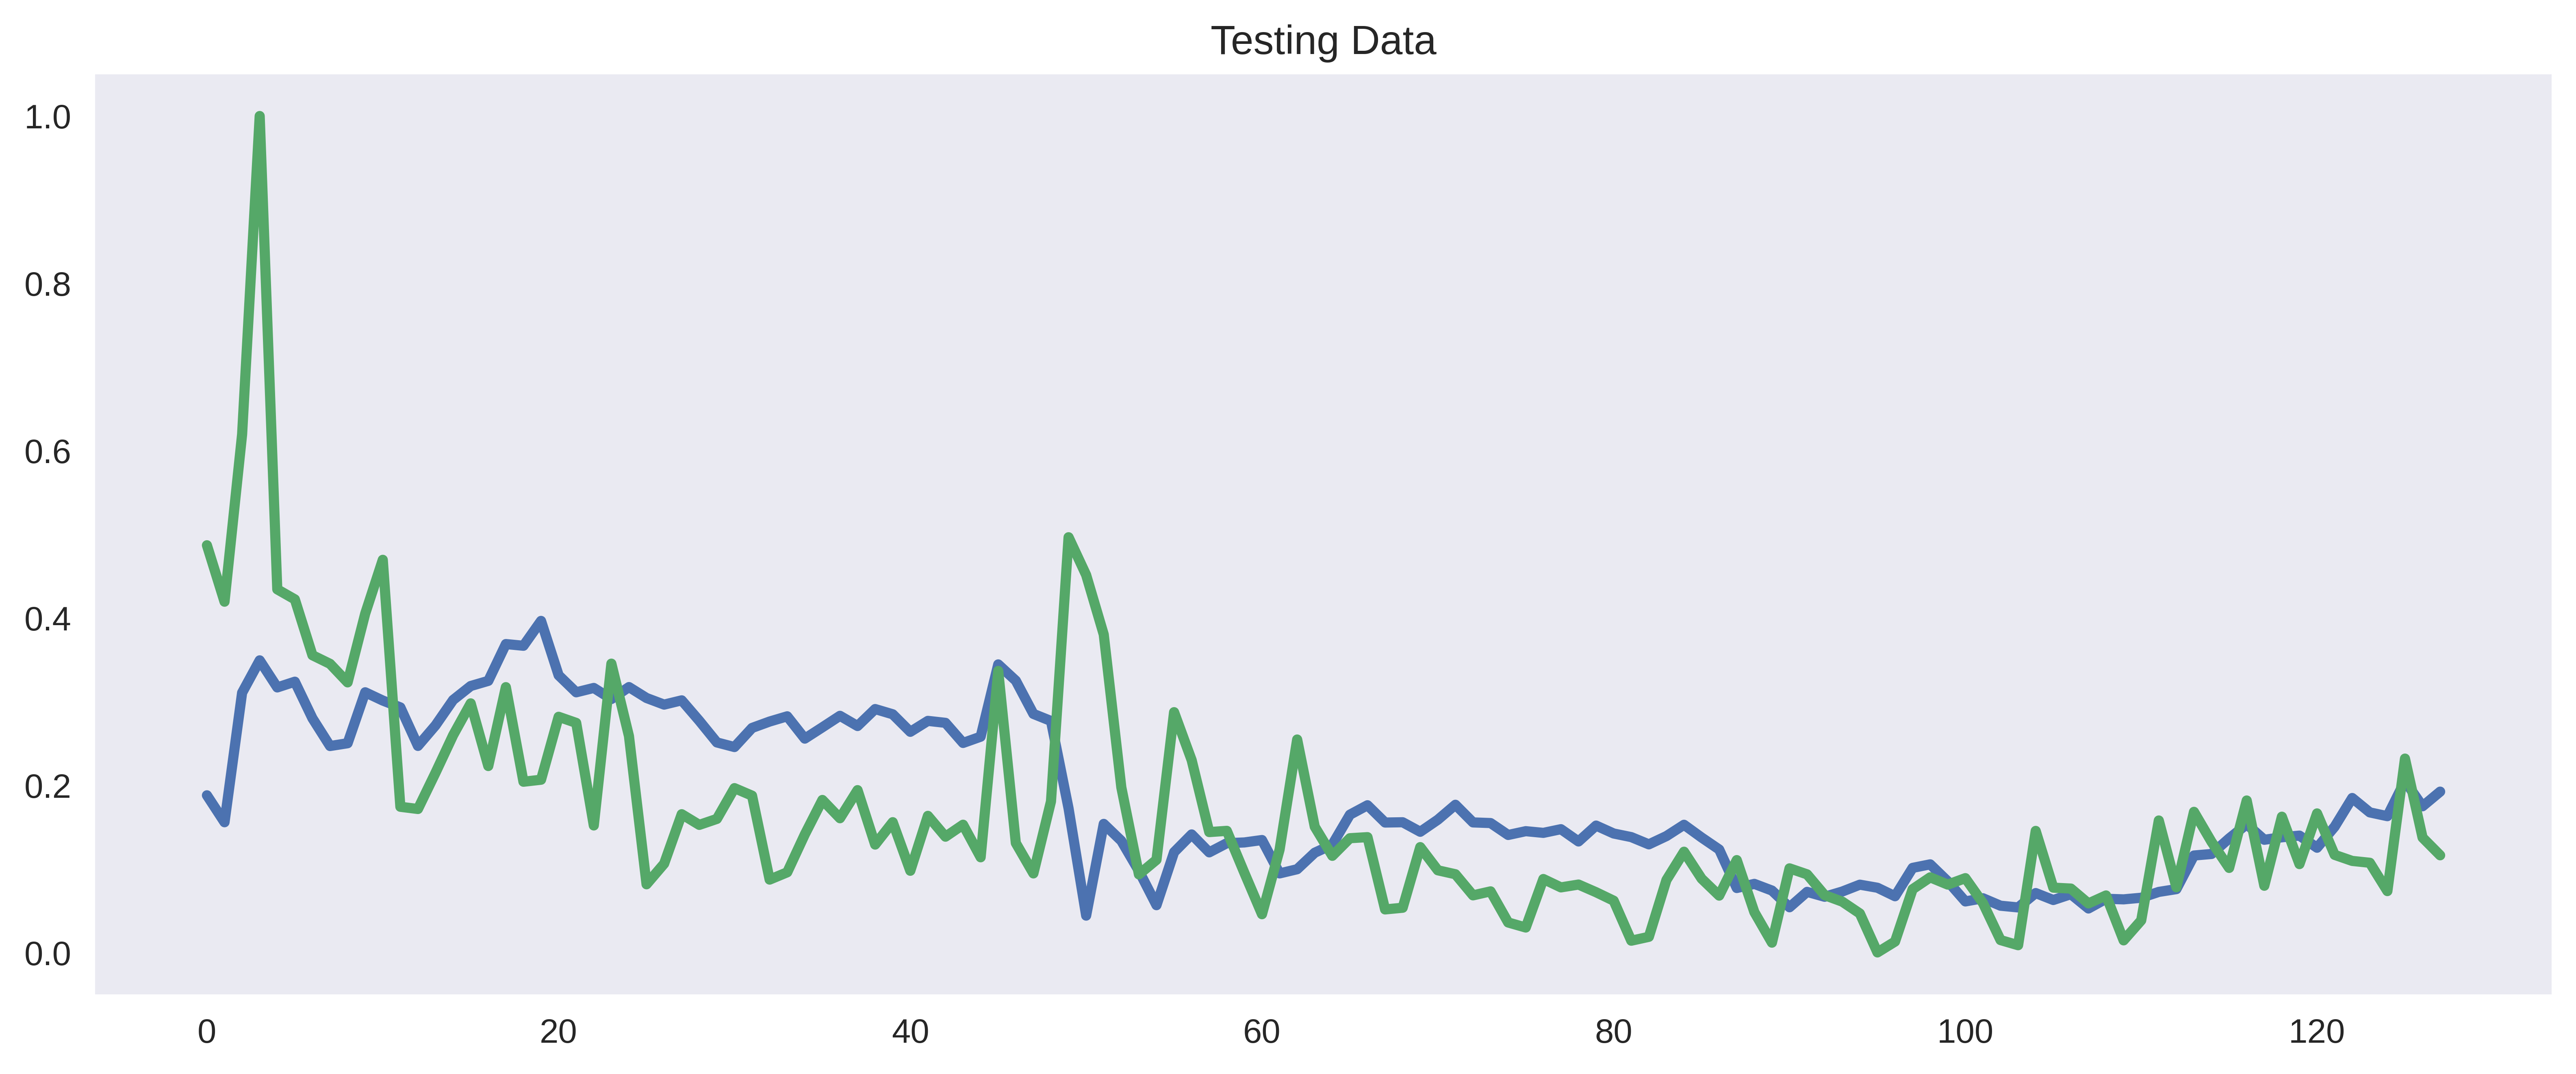

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.8779570515374713


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.544887  ],
       [0.51749325],
       [0.52174263],
       [0.52645443],
       [0.50293236],
       [0.53240179],
       [0.54855783],
       [0.5024043 ],
       [0.51168329],
       [0.59552122],
       [0.61583033],
       [0.63840736],
       [0.90102051],
       [0.99924394],
       [0.96899682],
       [0.89978777],
       [0.78233922],
       [0.88657244],
       [0.85937412],
       [0.84522021],
       [0.92745103],
       [0.90471308],
       [0.78985714],
       [0.82183275],
       [0.88580158],
       [0.81015089],
       [0.68966604],
       [0.72157421],
       [0.67526146],
       [0.68923259],
       [0.79761306],
       [0.76478226],
       [0.71423841],
       [0.81647322],
       [0.81986308],
       [0.78913488],
       [0.76062356],
       [0.69598968],
       [0.76576347],
       [0.71448296],
       [0.71776943],
       [0.70647052],
       [0.78709476],
       [0.73765857],
       [0.85304447],
       [0.82900847],
       [0.77533987],
       [0.797

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

365

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2022-01-26
1,2022-01-27
2,2022-01-28
3,2022-01-29
4,2022-01-30
...,...
360,2023-01-21
361,2023-01-22
362,2023-01-23
363,2023-01-24


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2022-01-26,0.550745
1,2022-01-27,0.527413
2,2022-01-28,0.533976
3,2022-01-29,0.541734
4,2022-01-30,0.517609
...,...,...
360,2023-01-21,0.167413
361,2023-01-22,0.162912
362,2023-01-23,0.204968
363,2023-01-24,0.174735


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2022-01-26,0.550745,0.544887
1,2022-01-27,0.527413,0.517493
2,2022-01-28,0.533976,0.521743
3,2022-01-29,0.541734,0.526454
4,2022-01-30,0.517609,0.502932
...,...,...,...
360,2023-01-21,0.167413,0.172120
361,2023-01-22,0.162912,0.165964
362,2023-01-23,0.204968,0.214672
363,2023-01-24,0.174735,0.180741


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2022-01-26,0.622072,2302112575,0.608770
1,2022-01-27,0.608770,1586137620,0.612512
2,2022-01-28,0.612512,1318006848,0.616935
3,2022-01-29,0.616935,958847124,0.603181
4,2022-01-30,0.603181,870878596,0.619149
...,...,...,...,...
361,2023-01-22,0.400967,780764704,0.424943
362,2023-01-23,0.424943,1980513812,0.407707
363,2023-01-24,0.407707,1265360172,0.417693
364,2023-01-25,0.417693,1104907019,0.414768


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2022-01-26,0.622072,2302112575,0.608770
1,2022-01-27,0.608770,1586137620,0.612512
2,2022-01-28,0.612512,1318006848,0.616935
3,2022-01-29,0.616935,958847124,0.603181
4,2022-01-30,0.603181,870878596,0.619149
...,...,...,...,...
361,2023-01-22,0.400967,780764704,0.424943
362,2023-01-23,0.424943,1980513812,0.407707
363,2023-01-24,0.407707,1265360172,0.417693
364,2023-01-25,0.417693,1104907019,0.414768


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[6.22072000e-01, 2.30211258e+09],
       [6.08770000e-01, 1.58613762e+09],
       [6.12512000e-01, 1.31800685e+09],
       [6.16935000e-01, 9.58847124e+08],
       [6.03181000e-01, 8.70878596e+08],
       [6.19149000e-01, 1.26653824e+09],
       [6.29233000e-01, 1.18303107e+09],
       [6.01483000e-01, 1.18273603e+09],
       [6.07684000e-01, 1.04229034e+09],
       [6.55877000e-01, 1.54318048e+09],
       [6.67127000e-01, 1.76038977e+09],
       [6.83647000e-01, 1.09514034e+09],
       [8.27819000e-01, 4.19740304e+09],
       [8.78194000e-01, 6.15938264e+09],
       [8.70627000e-01, 3.76026936e+09],
       [8.30010000e-01, 3.53500257e+09],
       [7.60226000e-01, 3.34620475e+09],
       [8.22408000e-01, 3.45725839e+09],
       [8.10273000e-01, 2.50419875e+09],
       [8.02218000e-01, 2.40130050e+09],
       [8.52333000e-01, 2.24970630e+09],
       [8.39036000e-01, 2.16500806e+09],
       [7.67173000e-01, 2.79802372e+09],
       [7.85890000e-01, 2.91309306e+09],
       [8.225280

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.55074513]),
 array([0.52741254]),
 array([0.53397626]),
 array([0.54173449]),
 array([0.51760907]),
 array([0.54561799]),
 array([0.56330599]),
 array([0.51463066]),
 array([0.52550763]),
 array([0.61004133]),
 array([0.62977457]),
 array([0.65875174]),
 array([0.91163893]),
 array([1.]),
 array([0.98672698]),
 array([0.91548209]),
 array([0.79307635]),
 array([0.90214768]),
 array([0.88086209]),
 array([0.86673309]),
 array([0.9546381]),
 array([0.93131429]),
 array([0.80526185]),
 array([0.8380927]),
 array([0.90235817]),
 array([0.82477232]),
 array([0.69351557]),
 array([0.72748656]),
 array([0.68523638]),
 array([0.68089682]),
 array([0.80829638]),
 array([0.77684598]),
 array([0.72601139]),
 array([0.83134656]),
 array([0.83628952]),
 array([0.80758248]),
 array([0.77897191]),
 array([0.7096635]),
 array([0.7837342]),
 array([0.73303117]),
 array([0.72828291]),
 array([0.72423102]),
 array([0.80537235]),
 array([0.75315206]),
 array([0.86662258]),
 array([0.83931528]),


In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((255, 1, 1), (110, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
7/7 [==============================] - 12s 324ms/step - loss: 0.2923 - val_loss: 0.0230
Epoch 2/20
7/7 [==============================] - 0s 18ms/step - loss: 0.2301 - val_loss: 0.0121
Epoch 3/20
7/7 [==============================] - 0s 25ms/step - loss: 0.1390 - val_loss: 0.0250
Epoch 4/20
7/7 [==============================] - 0s 21ms/step - loss: 0.0573 - val_loss: 0.1012
Epoch 5/20
7/7 [==============================] - 0s 20ms/step - loss: 0.0614 - val_loss: 0.0743
Epoch 6/20
7/7 [==============================] - 0s 18ms/step - loss: 0.0398 - val_loss: 0.0333
Epoch 7/20
7/7 [==============================] - 0s 21ms/step - loss: 0.0325 - val_loss: 0.0241
Epoch 8/20
7/7 [==============================] - 0s 19ms/step - loss: 0.0210 - val_loss: 0.0226
Epoch 9/20
7/7 [==============================] - 0s 25ms/step - loss: 0.0147 - val_loss: 0.0098
Epoch 10/20
7/7 [==============================] - 0s 21ms/step - loss: 0.0083 - val_loss: 0.0033
Epoch 11/20
7/7 [==========

In [102]:
# Make prediction
predicted = model.predict(X)

12/12 [==============================] - 1s 5ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.50238013,
 0.47956368,
 0.48596013,
 0.493543,
 0.47004232,
 0.4973477,
 0.5147539,
 0.46715733,
 0.47771055,
 0.5613486,
 0.58128536,
 0.6108431,
 0.88284564,
 0.9836789,
 0.9683465,
 0.88717026,
 0.75221133,
 0.87218934,
 0.848416,
 0.8327311,
 0.9315492,
 0.9050447,
 0.7653868,
 0.8011725,
 0.8724253,
 0.7866028,
 0.6467453,
 0.6822918,
 0.6381513,
 0.6336577,
 0.7686769,
 0.7347524,
 0.68073875,
 0.79378515,
 0.79919624,
 0.7679026,
 0.7370333,
 0.66358507,
 0.7421495,
 0.6881369,
 0.6831306,
 0.6788654,
 0.7655067,
 0.7094501,
 0.83260876,
 0.8025132,
 0.75434107,
 0.77964354,
 0.7646457,
 0.81591517,
 0.8158474,
 0.82506365,
 0.86622727,
 0.8403215,
 0.9032898,
 0.90119684,
 0.902764,
 0.9128609,
 0.8775398,
 0.89262974,
 0.9415883,
 0.9535707,
 0.942907,
 0.9485605,
 0.85680264,
 0.8826898,
 0.87713015,
 0.912825,
 0.88172525,
 0.8628318,
 0.75427085,
 0.80523294,
 0.740558,
 0.75857466,
 0.7453838,
 0.6313919,
 0.67082745,
 0.6841711,
 0.68966454,
 0.800759,
 0.79339564,
 0.

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2022-01-27
2,2022-01-28
3,2022-01-29
4,2022-01-30
5,2022-01-31
...,...
361,2023-01-22
362,2023-01-23
363,2023-01-24
364,2023-01-25


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2022-01-27,0.502380
2,2022-01-28,0.479564
3,2022-01-29,0.485960
4,2022-01-30,0.493543
5,2022-01-31,0.470042
...,...,...
361,2023-01-22,0.155198
362,2023-01-23,0.151468
363,2023-01-24,0.186624
364,2023-01-25,0.161281


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2022-01-27,0.502380,0.527413
2,2022-01-28,0.479564,0.533976
3,2022-01-29,0.485960,0.541734
4,2022-01-30,0.493543,0.517609
5,2022-01-31,0.470042,0.545618
...,...,...,...
361,2023-01-22,0.155198,0.162912
362,2023-01-23,0.151468,0.204968
363,2023-01-24,0.186624,0.174735
364,2023-01-25,0.161281,0.192251


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")